# Import the necessary libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')


# Load Dataset

In [61]:
df = pd.read_csv("ToyotaCorolla - MLR.csv")

In [62]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [63]:
df.shape

(1436, 11)

# Exploratory Data Analysis (EDA)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [65]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [66]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


## Correlation Heatmap

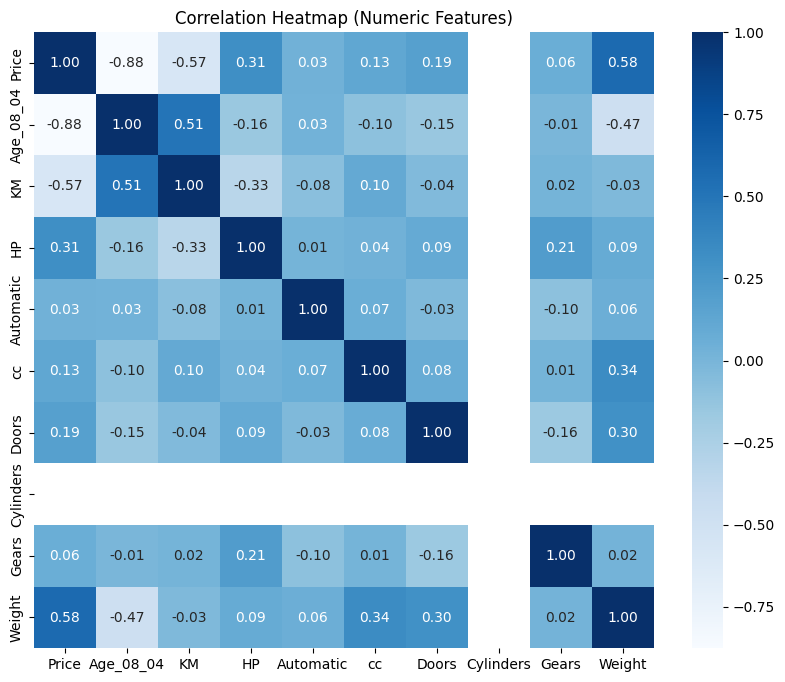

In [67]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [68]:
# Correlation of numeric features with Price
corr_with_price = df.select_dtypes(include=[np.number]).corr()['Price'].sort_values(ascending=False)
print("Correlation of Features with Price:\n", corr_with_price)


Correlation of Features with Price:
 Price        1.000000
Weight       0.581198
HP           0.314990
Doors        0.185326
cc           0.126389
Gears        0.063104
Automatic    0.033081
KM          -0.569960
Age_08_04   -0.876590
Cylinders         NaN
Name: Price, dtype: float64


## Hist plot

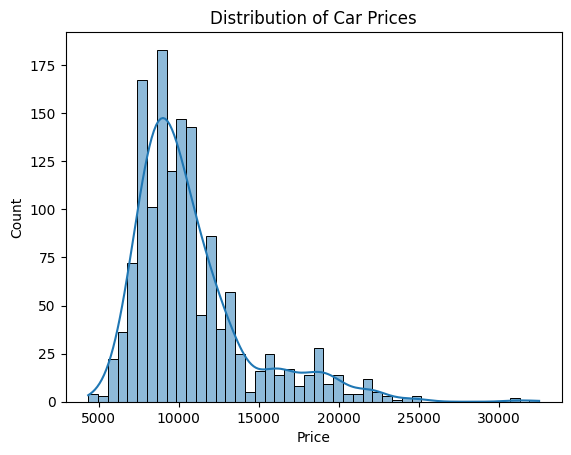

In [69]:
# Distribution of car prices
sns.histplot(df['Price'], kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.show()


## Count Plots

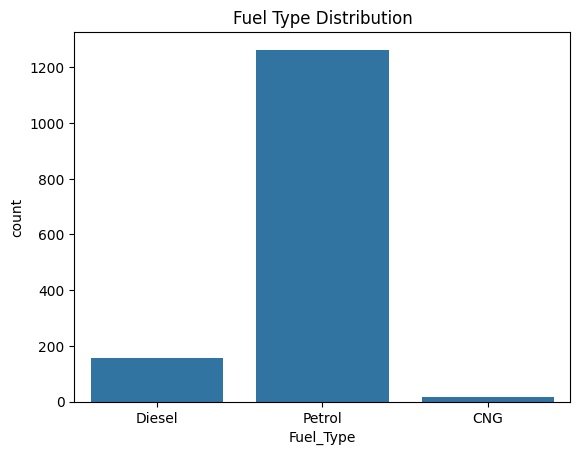

In [70]:
# Fuel Type Distribution
sns.countplot(x='Fuel_Type', data=df)
plt.title("Fuel Type Distribution")
plt.show()


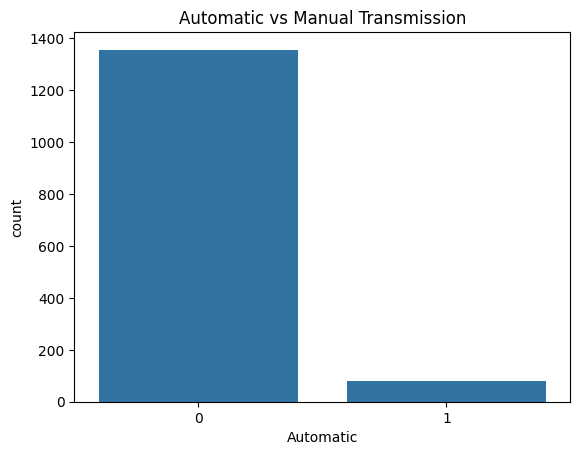

In [71]:
# Automatic vs Manual
sns.countplot(x='Automatic', data=df)
plt.title("Automatic vs Manual Transmission")
plt.show()


## Box Plots

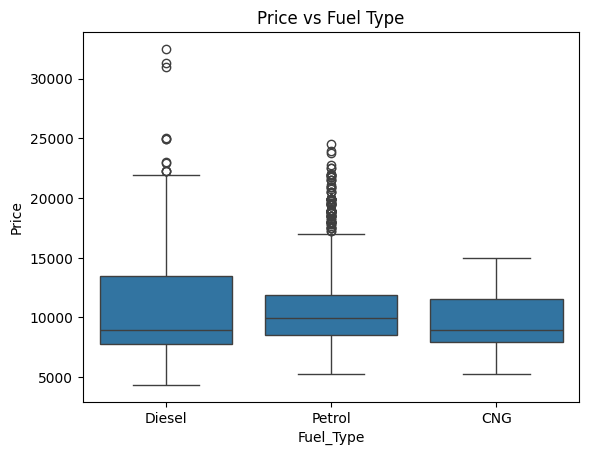

In [72]:
# Price vs Fuel Type
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.title("Price vs Fuel Type")
plt.show()


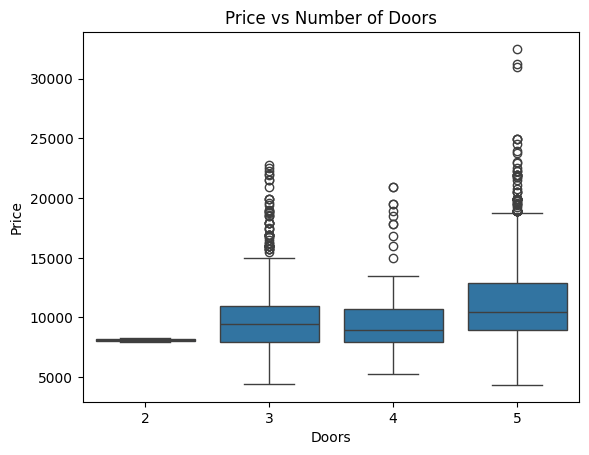

In [73]:
#Price vs Number of Doors
sns.boxplot(x='Doors', y='Price', data=df)
plt.title("Price vs Number of Doors")
plt.show()

## Scatter Plots

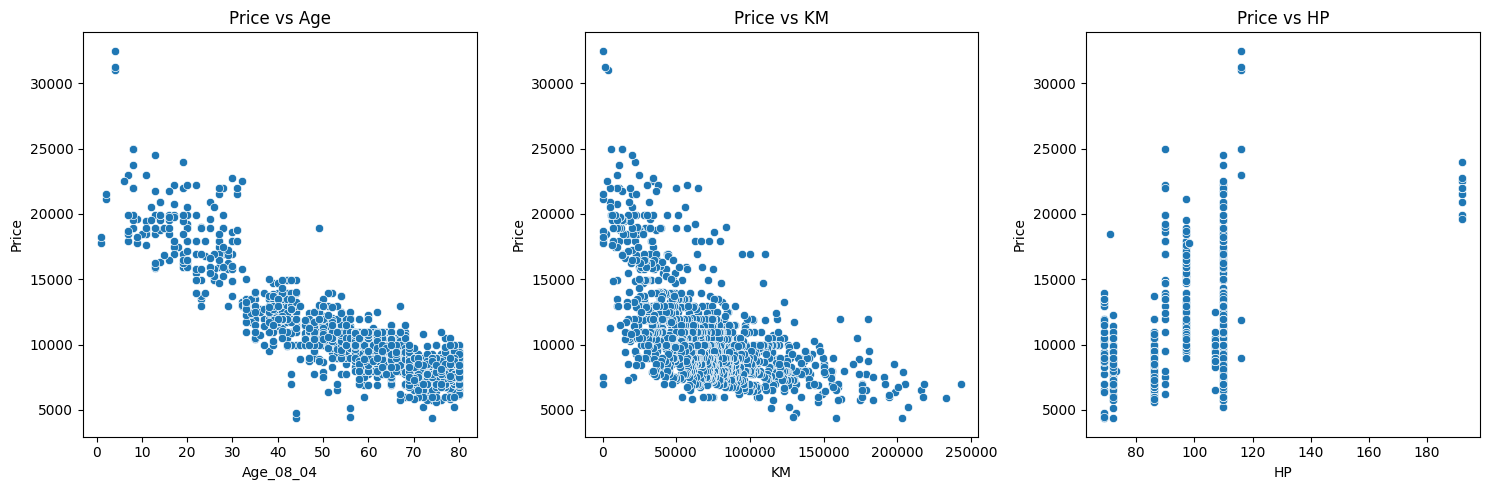

In [74]:
# Scatter plots of Price vs key numeric features
fig, axs = plt.subplots(1, 3, figsize=(15,5))

sns.scatterplot(x='Age_08_04', y='Price', data=df, ax=axs[0])
axs[0].set_title("Price vs Age")

sns.scatterplot(x='KM', y='Price', data=df, ax=axs[1])
axs[1].set_title("Price vs KM")

sns.scatterplot(x='HP', y='Price', data=df, ax=axs[2])
axs[2].set_title("Price vs HP")

plt.tight_layout()
plt.show()


## Key Insights from EDA
- Car **Age** has a negative relationship with Price - older cars are cheaper.  
- Cars with higher **KM (mileage)** tend to have lower prices.  
- **Diesel cars** are priced higher on average than Petrol cars.  
- **Weight** and **Horsepower (HP)** show positive correlation with Price.  
- Number of **Doors** does not strongly affect Price.  


# Data Preprocessing

In [75]:
# Separate target and features
y = df['Price']
x = df.drop(columns=['Price'])


In [76]:
# Identify numeric and categorical columns
num_cols = x.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = x.select_dtypes(include=['object']).columns.tolist()

print("Numeric Columns:", num_cols)
print("Categorical Columns:", cat_cols)


Numeric Columns: ['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']
Categorical Columns: ['Fuel_Type']


In [77]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

print("Preprocessing pipeline created successfully")

Preprocessing pipeline created successfully


# Model Building and Evaluation

In [78]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [79]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42)
    }


In [80]:
# Dictionary to store results
results = {}


In [81]:
# Train and evaluate models
for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    results[name] = {"R2": round(r2, 3), "RMSE": round(rmse, 2)}


In [82]:
# Show results in table
pd.DataFrame(results).T.sort_values(by="R2", ascending=False)


,R2,RMSE
Random Forest,0.912,1172417.83
Lasso,0.836,2193065.87
Ridge,0.835,2196009.75
Linear Regression,0.835,2203043.82


### Model Evaluation Plots

In [83]:
best_model = RandomForestRegressor(random_state=42)


In [84]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('model', best_model)])
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)


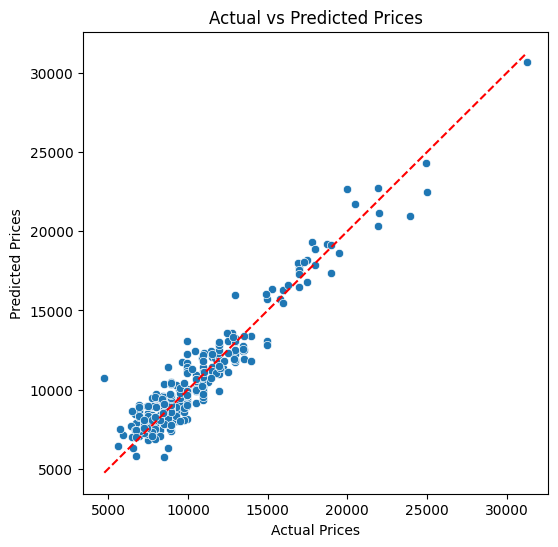

In [85]:
# Actual vs Predicted
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")
plt.show()


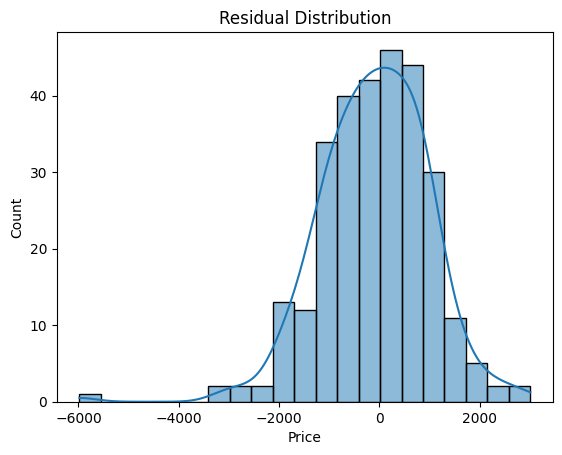

In [86]:
# Residual Distribution
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()


In [87]:
# Print final scores
from math import sqrt

# Calculate metrics
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))   # take sqrt manually

print("R2 Score:", round(r2, 3))
print("RMSE:", round(rmse, 2))


R2 Score: 0.912
RMSE: 1082.78


## Saving models

In [88]:
joblib.dump(pipe, "random_forest_pipeline.pkl")

print("Model saved successfully!")

Model saved successfully!


## Conclusion

- We built multiple regression models (Linear Regression, Ridge, Lasso, Random Forest) to predict the price of Toyota Corolla cars.  
- Among all models, **Random Forest performed the best** with an R² score of **0.91**, indicating it explains about 91% of the variance in car prices.  
- The RMSE for Random Forest was significantly lower than other models, showing more accurate predictions.  
- Key insights from EDA:  
  - Car **Age** and **KM (mileage)** negatively impact price.  
  - **Weight** and **Horsepower (HP)** have positive influence on price.  
  - **Fuel Type** also affects price (Diesel cars generally higher).  
- This project demonstrates an **end-to-end machine learning workflow**: EDA, preprocessing, model building, evaluation, and interpretation.  

**Next Steps:**  
- Tune hyperparameters of Random Forest for even better performance.  
- Try advanced algorithms such as XGBoost or LightGBM.  
- Deploy the model using Streamlit or Flask for real-world use.  
